### Bootstrap
##### Comparaison between two estimators 

Let $\mathcal{X} = \left\lbrace X_1, \cdots, X_n \right\rbrace$ be an i.i.d sample from a Bernoulli distribution with parameter $\theta\in(0,1)$.

Consider the two estimators:

* MinMax estimator: $$\hat{\theta}_1 = \frac{\frac{\sqrt{n}}{2}+\sum\limits_{i=1}^n X_i}{n + \sqrt{n}},$$

* MLE estimator: $$ \hat{\theta}_2 = \frac{1}{n}\sum\limits_{i=1}^n X_i.$$

Assume we generated a sample of size $n=40$ such that $\sum\limits_{i=1}^{40}X_i = 23.$

* Compute the bootstrap bias and the variance of each estimator.
* $\clubsuit$ Compare the MSE (mean squared error) of the two estimator using Monte Carlo method.

In [63]:
import numpy as np
np.random.seed(12)

# Parameters
n = 40
num_ones = 23

# Generate the sample
X = np.zeros(n, dtype=int)
X[:num_ones] = 1
np.random.shuffle(X)

In [64]:
def est_theta(X, estimator = "MLE"):
    """
    This function estimates the parameter theta of a Bernoulli distribution

    Parameters
    ----------
    X : array-like
        A sample of data
    estimator : str
        The estimator to use. Either "MLE" or "minmax"
    
    Returns
    -------
    float
        The estimated value of theta
    """
    n = len(X)
    y = np.sum(X)

    if estimator == "MLE":
        return y/n
    else:
        return (y+np.sqrt(n)/2)/(n+np.sqrt(n))

In [65]:
# Compare the two estimators using bootstrap
B_est_mle, B_est_mm = [], []
B = 5000
for b in range(B):
    X_b = np.random.choice(X, n, replace=True)
    B_est_mle.append(est_theta(X_b, "MLE"))
    B_est_mm.append(est_theta(X_b, "minmax"))

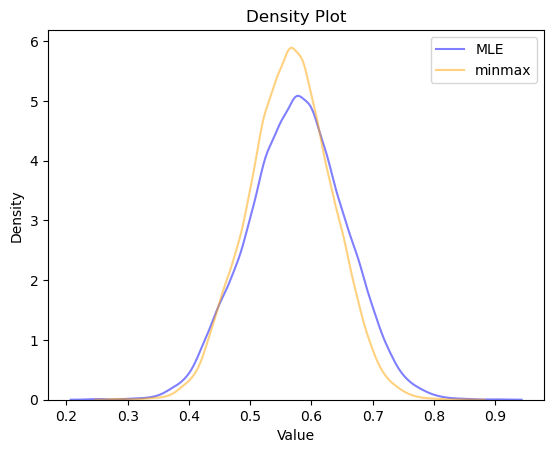

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot density
sns.kdeplot(B_est_mle, label="MLE", alpha=0.5, color="blue")
sns.kdeplot(B_est_mm, label="minmax", alpha=0.5, color="orange")

plt.legend()
plt.title("Density Plot")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

In [69]:
# Variances of the estimators
np.var(B_est_mle), np.var(B_est_mm)

(0.006224336975, 0.004640775513830108)